# Task 1 - Vector fields, orbits, and visualization
3 different matrices $A_\alpha$ produce the desired phase portraits.  
As first step, in function $sysmat(alpha)$ de-comment the system matrix you want to have. In the same line you can see with which alpha it produces a certain phase portrait.  
In the second step set alpha to the desired value at the beggining of the third cell.  
In the third step de-comment the plotting line for the system matrix and alpha you have chosen. This scales the plot, but doesn't change its quality.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp, odeint

In [2]:
def sysmat(alpha):
    """
    System matrix dependend on alpha
    """
    A = [[alpha, alpha], [-0.25, 0]] # This is A1. With alpha= 0.1: unstable focus, 2.0: unstable node
    #A = [[-alpha, alpha], [-0.25, 0]] # This is A2. With alpha= 0.1: stable focus, 2.0: stable node
    #A = [[alpha, 0], [0, -alpha]] # This is A3. With alpha= 1.0: saddle unstable
    return A

def model(t, y, alpha):
    """
    Model: System matrix times input
    
    Parameters:
    -----------
    y
        State 2-dim
    alpha
        Parameter for system matrix
    """
    #vectorized - currently used
    A = sysmat(alpha)
    dxdt = np.dot(A, y)
    #dx1dt, dx2dt = dxdt[:]
    
    #unvectorized
    #x1, x2 = y[:]
    #dx1dt = alpha * x1 + alpha * x2
    #dx2dt = -0.25 * x1
    
    return dxdt

# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0+1
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-12
atol=1e-12

# model parameters
alpha = 0.0 # is changed later on

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(-5.0, -5.0), high=(5.0, 5.0), size=(2,))

time = np.linspace(t_0,t_end,NT)

In [3]:
def clean_l_h(x1, x2):
    '''
    currently not used, intended for visualization
    returns the lowest (l) and highest (h) value in the vectors x1, x2 without nan and inf values
    '''
    if np.isnan(x1.min()) or np.isinf(x1.min()):
        if np.isnan(x2.min()) or np.isinf(x2.min()):
            l = -10
        else:
            l = x2.min()
    else:
        if np.isnan(x2.min()) or np.isinf(x2.min()):
            l = x1.min()
        else:
            l = min(x1.min(),x2.min())

    if np.isnan(x1.max()) or np.isinf(x1.max()):
        if np.isnan(x2.max()) or np.isinf(x2.max()):
            h = 10
        else:
            h = x2.max()
    else:
        if np.isnan(x2.max()) or np.isinf(x2.max()):
            h = x1.max()
        else:
            h = max(x1.max(),x2.max())
    return l, h

c:\users\ludwig\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\_ivp\rk.py:569: RuntimeWarning: invalid value encountered in add
  y += f


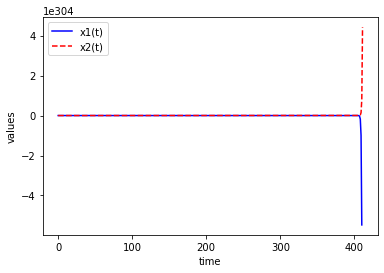

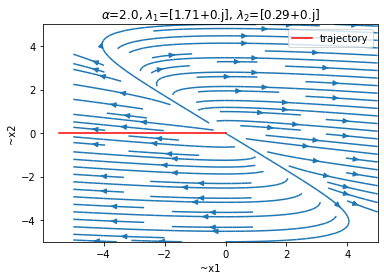

In [4]:
alpha = 2.0 # Change alpha to get desired output

# calculate eigenvalues and round to 2 decimals
w, _ = np.linalg.eig(sysmat(alpha))
w_rounded = np.zeros((2,1), dtype=complex)
w_rounded[0] = complex(round(w[0].real,2),round(w[0].imag,2))
w_rounded[1] = complex(round(w[1].real,2),round(w[1].imag,2))

# solve the system for initial condition 'SIM0' and time span 'time'
sol = solve_ivp(fun=model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(alpha,), vectorized=True, method='DOP853', rtol=rtol, atol=atol)
x1 = sol.y[0, :]
x2 = sol.y[1, :]

# plot the solutions x1, x2 over time
plt.plot(sol.t,x1,'b-',label='x1(t)')
plt.plot(sol.t,x2,'r--',label='x2(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

# plot the vector field
#l, h = clean_l_h(x1, x2) # fixed values turn out to be better for visualization
l = -5
h = 5
#print('l: '+str(l)+', h: '+str(h))
Y, X = np.mgrid[l:h:100j, l:h:100j]
U = sysmat(alpha)[0][0] * X + sysmat(alpha)[0][1] * Y
V = sysmat(alpha)[1][0] * X + sysmat(alpha)[1][1] * Y
plt.streamplot(X, Y, U, V, density=[0.5, 1])

# plot the trajectory for the given initial condition
# for better visualization choose the line corresponding to the scenario:

plt.plot(1e-304*x1,1e-320*x2,'r-',label='trajectory') # A1, alpha = 2.0
#plt.plot(1e-22*x1,1e-22*x2,'r-',label='trajectory') # A1, alpha = 0.1
#plt.plot(x1,x2,'r-',label='trajectory') # A2, alpha = 0.1
#plt.plot(x1,x2,'r-',label='trajectory') #A2, alpha = 2.0
#plt.plot(1e-305*x1,x2,'r-',label='trajectory') #A3 , alpha =1.0

plt.ylabel('~x2')
plt.xlabel('~x1')
plt.legend(loc='best')
plt.title(r'$\alpha$='+str(alpha)+', $\lambda_1$='+str(w_rounded[0])+', $\lambda_2$='+str(w_rounded[1]))
plt.show()